## Optimisation Model

### Random Forest
- The advantage of using this technique is that we get lower variance, reduced overfitting and higher accuracy.
- Healthcare and Medical Industry --> Diabetes Prediction, Cardiovascular disease prediction, Breast Cancer Prediction

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
sb.set() 

In [2]:
thedata = pd.read_csv('C:/Users/mani7/OneDrive/Desktop/NTU CEG/Y1S2/SC1015/project/diabetes.csv')
thedata.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# List of columns to remove
columns_to_remove = ['SkinThickness', 'Age']

# Drop the specified columns
cleaned_df = thedata.drop(columns=columns_to_remove)
cleaned_df.head()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Outcome
0,6,148,72,0,33.6,0.627,1
1,1,85,66,0,26.6,0.351,0
2,8,183,64,0,23.3,0.672,1
3,1,89,66,94,28.1,0.167,0
4,0,137,40,168,43.1,2.288,1


In [4]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(criterion='gini')

In [5]:
from sklearn.model_selection import train_test_split #To split data randomly

In [6]:
X = cleaned_df.drop('Outcome', axis=1)
y = cleaned_df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [7]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [8]:
rfc.score(X_test, y_test)

0.7142857142857143

### Printing the first 3 Trees

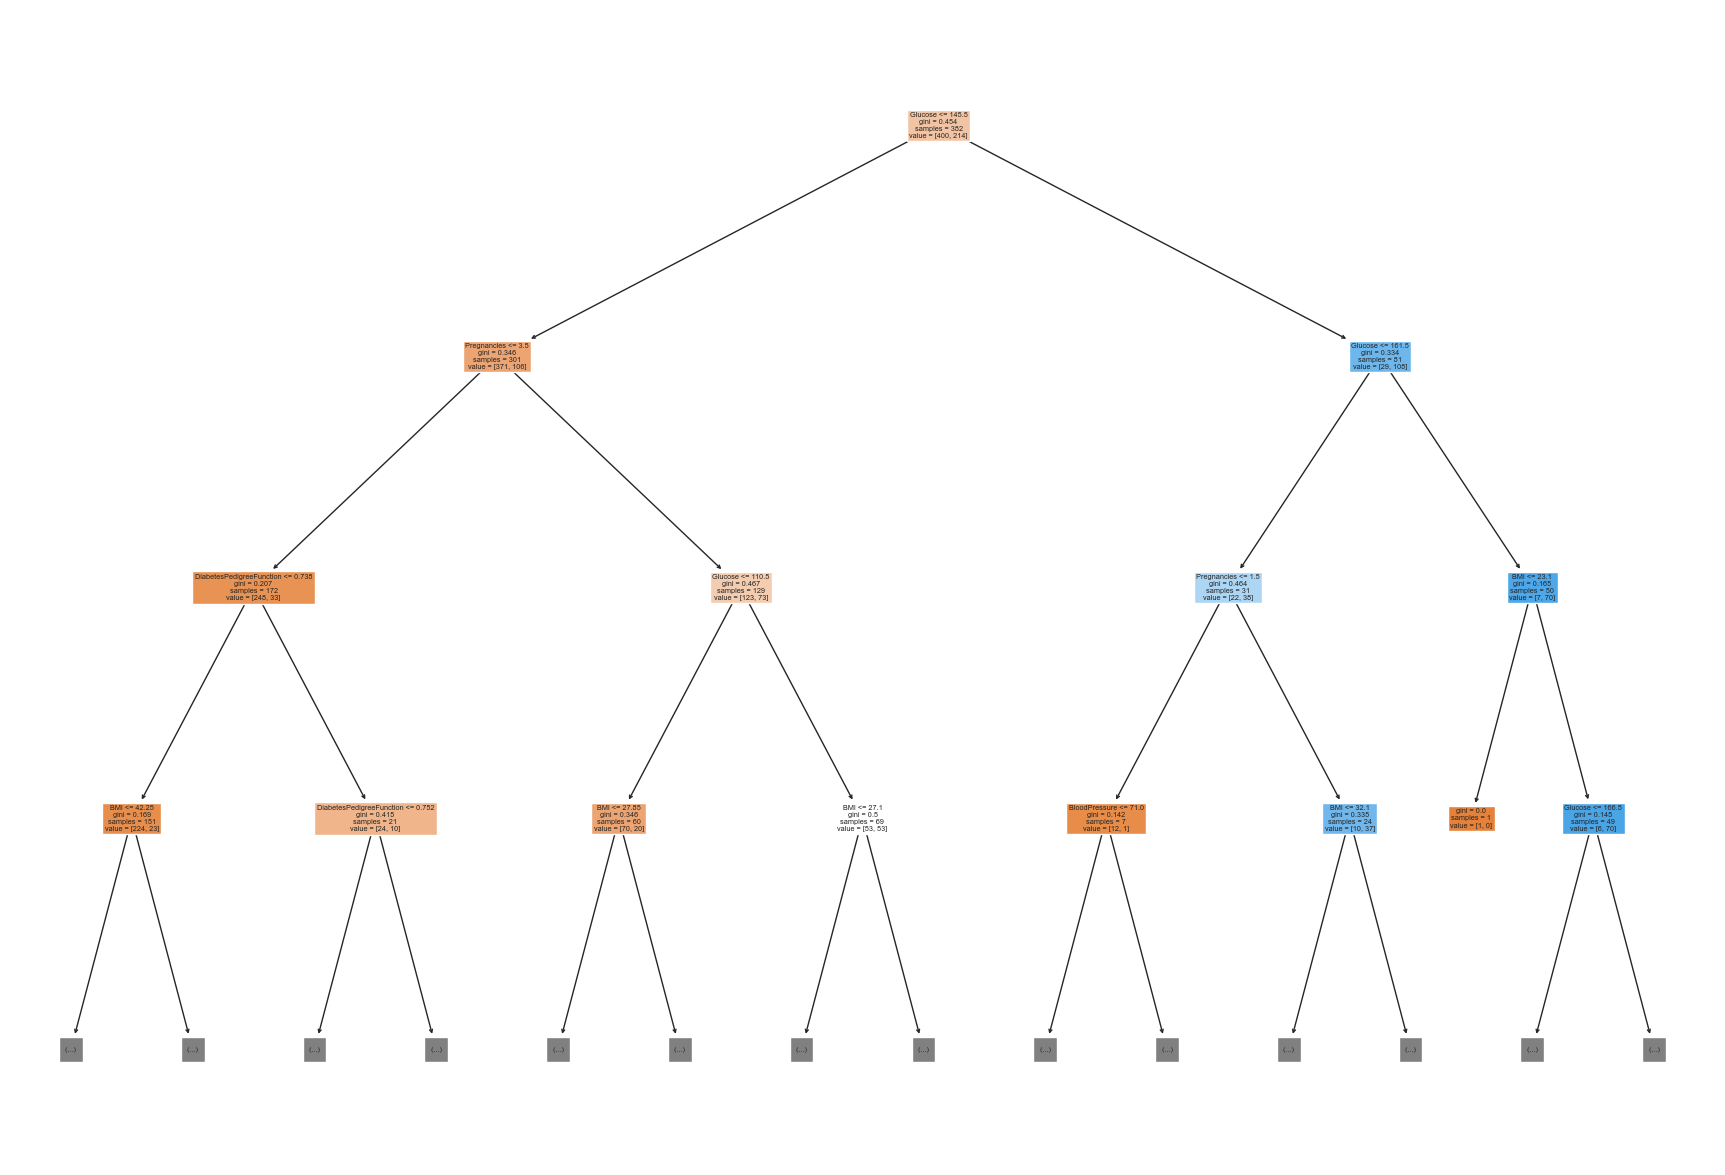

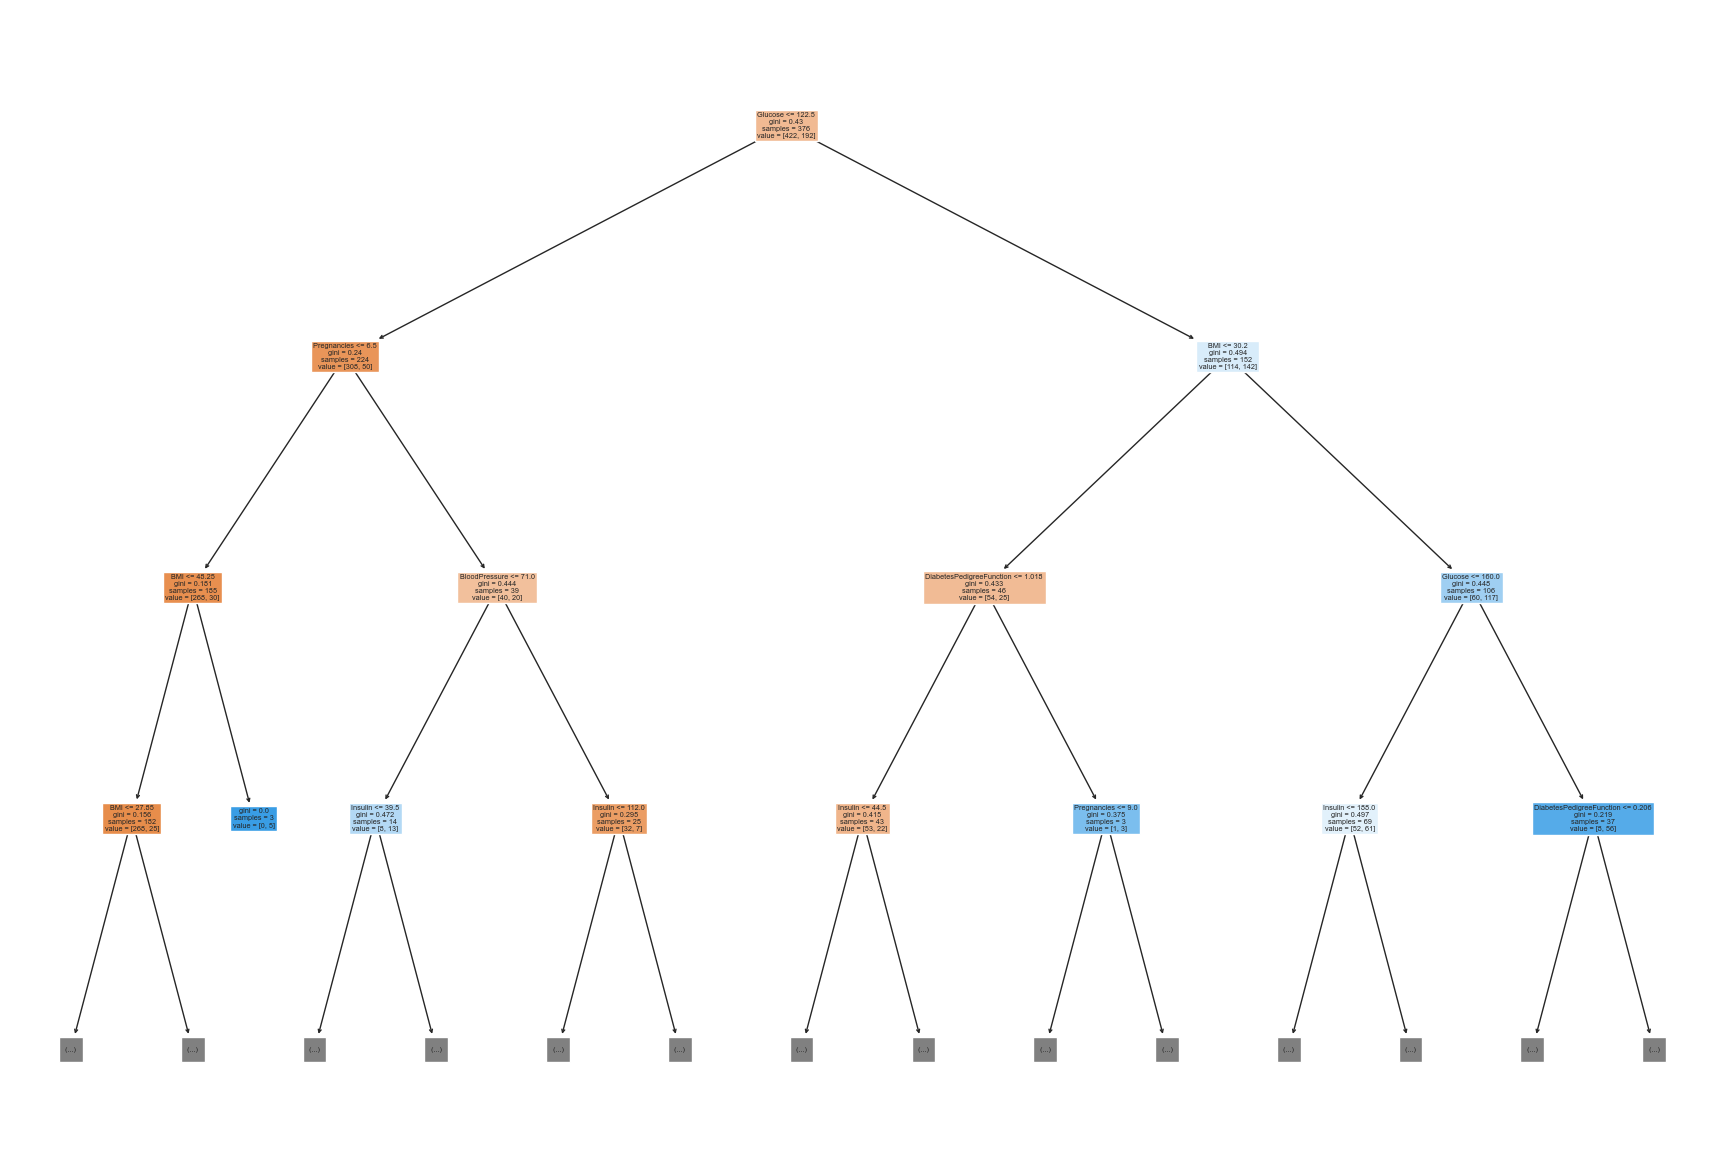

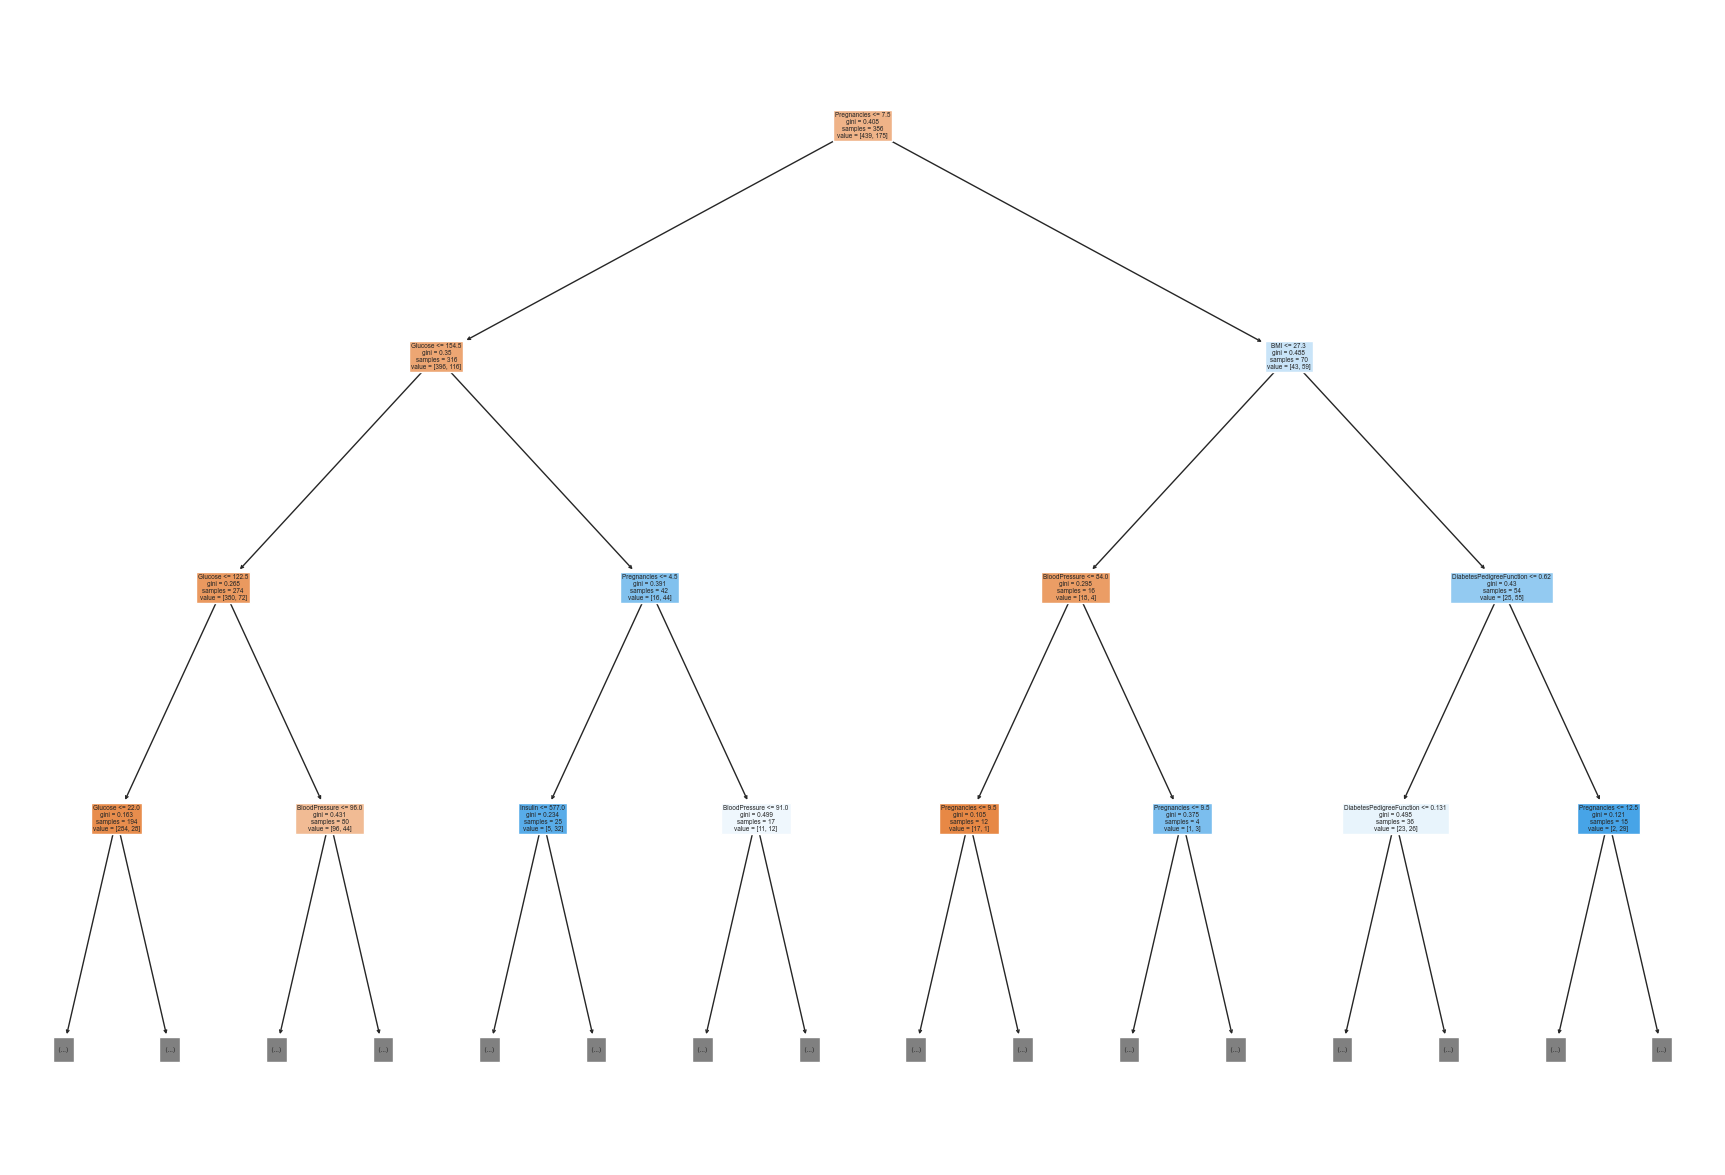

In [9]:
## printing first 3 trees
for i in range(3):
    tree = rfc.estimators_[i]
    
    plt.figure(figsize=(22, 15))  # Adjust the figure size as needed
    plot_tree(tree, feature_names = X_train.columns, filled=True, max_depth=3, impurity=True)
    plt.show()

- n_estimators: the number of decision trees in the forest. Increasing this hyperparameter generally improves the performance of the model but also increases the computational cost of training and predicting.
- 
max_depth: the maximum depth of each decision tree in the forest. Setting a higher value for max_depth can lead to overfitting while setting it too low can lead to underfitting.

In [10]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [11]:
param_dist = {'n_estimators': randint(50,500), 'max_depth': randint(1,20)}

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rfc, param_distributions = param_dist, n_iter=5, cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000021465A3E550>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000214656EF2D0>})

In [12]:
best_estimator = rand_search.best_estimator_      # Access the best estimator

best_params = rand_search.best_params_            # Access the best hyperparameters

In [13]:
print("Best estimator:", best_estimator)
print("Best hyperparameters:", best_params)

Best estimator: RandomForestClassifier(max_depth=13, n_estimators=454)
Best hyperparameters: {'max_depth': 13, 'n_estimators': 454}


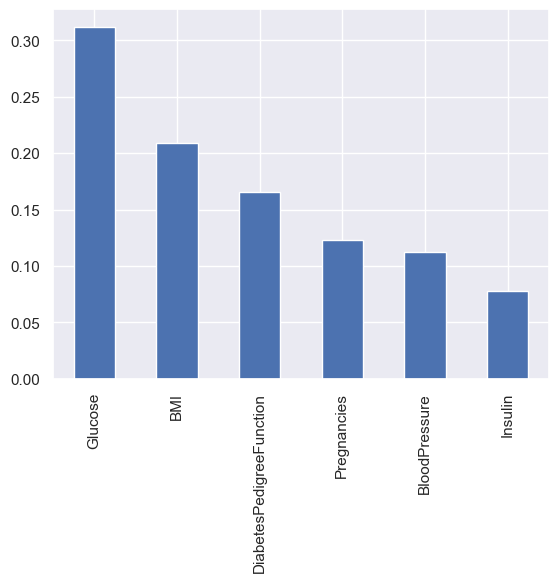

In [14]:
# Create a variable for the best model
best_model = rand_search.best_estimator_

# Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(best_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot a simple bar chart
feature_importances.plot.bar();

Through hyperparameter tuning, we obtain the best estimator and use that to determine the most important features in the dataset. Through feature importance analysis, we can conclude which variable has the most significant influence on the outcome. 

From the above bar chart, we can deduce that Glucose is indeed the most important contibuting factor to determination of outcome.